# <center>Principal Component Analysis (PCA)</center>

- [1. Giới thiệu](#1.-Giới-thiệu)
    - [1.1 Giới thiệu về PCA](#1.1-Giới-thiệu-về-PCA)
    - [1.2 Cở sở toán học](#1.2-Cở-sở-toán-học)
- [2. Thuật toán PCA](#2.-Thuật-toán-PCA)
    - [2.1 PCA là gì?](#2.1-PCA-là-gì?)
    - [2.2 Các bước của thuật toán PCA](#2.2-Các-bước-của-thuật-toán-PCA)
- [3. Demo đơn giản](#3.-Demo-đơn-giản)
- [4. Kết luận](#4.-Kết-luận)
    - [4.1 Ưu điểm của PCA](#4.1-Ưu-điểm-của-PCA)
    - [4.2 Nhược điểm của PCA](#4.2-Nhược-điểm-của-PCA)
- [5. Tài liệu tham khảo](#5.-Tài-liệu-tham-khảo)

# 1. Giới thiệu

Với thời đại dữ liệu bùng nổ như ngày nay, dữ liệu ta thu thập được rất lớn. Trong thực tế, các **vector đặc trưng** (*feature vectors*) có thể có số chiều rất lớn, tới vài nghìn. Đồng thời, lượng điểm dữ liệu cũng rất lớn. Điều đó sẽ gây khó khăn cho việc lưu trữ và tính toán. Vì vậy, một trong những bước quan trọng trong nhiều bài toán học máy là ta phải **giảm chiều dữ liệu** (*dimentionality reduction*).

**Giảm chiều dữ liệu** còn là phương pháp được sử dụng để giảm vấn đề **quá khớp** (*overfitting*),nó có hai hướng là hướng **lựa chọn đặc trưng** (*feature selection*) và hướng **trích xuất đặc trưng** (*feature extraction*). Hôm nay ta sẽ tìm hiểu về một thuật toán theo hướng **trích xuất đặc trưng** là Principal Component Analysis (PCA).

## 1.1 Giới thiệu về PCA

![](https://github.com/HuynhHoa99/MachineLearningAlgorithm/blob/master/image/pca1.PNG?raw=true)

Cùng là 1 chú lạc đà, tuy nhiên với các góc nhìn khác nhau (trục thông tin), chúng ta có những cách thu nhận thông tin khác nhau và cho ta những kết luận khác nhau.

PCA là thuật toán tìm một không gian mới (với số chiều nhỏ hơn không gian cũ), các trục tọa độ trong không gian mới được xây dựng sao cho trên mỗi trục, độ biến thiên của dữ liệu trên đó là lớn nhất có thể.

Ví dụ minh họa:

![](https://github.com/HuynhHoa99/MachineLearningAlgorithm/blob/master/image/pca2.PNG?raw=true)

## 1.2 Cở sở toán học

##### Kỳ vọng (mean)
- Là giá trị mong muốn, nó đơn giản là trung bình cộng của toàn bộ các giá trị

Cho $N$ giá trị $x_1, x_2, ..., x_N$.

$$\bar{x} = \frac{1}{N} \sum_{i=1}^{N}x_i$$


##### Phương sai (variance)
- Là trung bình cộng của bình phương khoảng cách từ mỗi điểm tới kỳ vọng, phương sai càng nhỏ thì các điểm dữ liệu càng gần với kỳ vọng, tức các điểm dữ liệu càng giống nhau. Phương sai càng lớn thì ta nói dữ liệu càng có tính phân tán

$$\sigma^2 = \frac{1}{N-1} \sum_{i=1}^{N}(x_i-\bar{x})^2$$


##### Hiệp phương sai (covariance)
- Là độ đo sự biến thiên cùng nhau của hai biến ngẫu nhiên (phân biệt với phương sai - đo mức độ biến thiên của một biến). Nếu 2 biến có xu hướng thay đổi cùng nhau (nghĩa là, khi một biến có giá trị cao hơn giá trị kỳ vọng thì biến kia có xu hướng cũng cao hơn giá trị kỳ vọng), thì hiệp phương sai giữa hai biến này có giá trị dương. Mặt khác, nếu một biến nằm trên giá trị kỳ vọng còn biến kia có xu hướng nằm dưới giá trị kỳ vọng, thì hiệp phương sai của hai biến này có giá trị âm. Nếu hai biến này độc lập với nhau thì giá trị bằng 0

$$COV(X, Y) = \frac{\sum_{i=1}^{N}(X_i - \bar{X})(Y_i - \bar{Y})}{N}$$

##### Ma trận hiệp phương sai
- Cho N điểm dữ liệu được biểu diễn bởi các vector cột $x_1, ..., x_N$, khi đó, vector kỳ vọng và ma trận hiệp phương sai của toàn bộ dữ liệu được định nghĩa là:

$$\bar{x} = \frac{1}{N} \sum_{i=1}^{N}x_i$$

$$S = \frac{1}{N} \sum_{i=1}^{N}(x_i - \bar{x})(x_i - \bar{x})^T = \frac{1}{N}\hat{X}\hat{X}^T$$

- Ma trận hiệp phương sai là một ma trận đối xứng, hơn nữa, nó là một ma trận nửa xác định dương.
- Mọi phần tử trên đường chéo của ma trận hiệp phương sai là các số không âm. Chúng cũng chính là phương sai của từng chiều của dữ liệu.
- Các phần tử ngoài đường chéo $S_{ij}, i \ne j$ thể hiện sự tương quan giữa thành phần thứ i và thứ j của dữ liệu, còn được gọi là hiệp phương sai. Giá trị này có thể dương, âm hoặc bằng 0. Khi nó bằng 0, ta nói rằng hai thành phần i, j trong dữ liệu là không tương quan (*uncorrelated*).
- Nếu ma trận hiệp phương sai là ma trận đường chéo, ta có dữ liệu hoàn toàn không tương quan giữa các chiều.

Minh hoạ ma trận hiệp phương sai:
$$S = \begin{bmatrix}{var(x)} & {cov(x,y)} \\ {cov(y,x)} & {var(y)} \end{bmatrix}$$

##### Trị riêng (*eigenvalue*), vector riêng(*eigenvector*) của covariance matrix
Cho một ma trận vuông $A \in R^{n \times n}$, nếu số vô hướng $\lambda$ và vector $x \ne 0 \in R^n$ thoả mãn:

$$Ax = \lambda x$$

thì $\lambda$ được gọi là một trị riêng của $A$ và $x$ được gọi là vector riêng tương ứng với trị riêng đó.

- Trị riêng là nghiệm của phương trình đặc trưng $$det(A - \lambda I) = 0$$
- Một trị riêng có thể có nhiều vector riêng
- Mỗi vector riêng chỉ ứng với một trị riêng duy nhất
- Nếu $x$ là một vector riêng của A ứng với $\lambda$ thì $kx, k \ne 0$ cũng là vector riêng ứng với trị riêng đó
- Mọi ma trận vuông bậc n đều có n trị riêng (kể cả lặp) và có thể là các số phức.
- Với ma trận đối xứng, tất cả các trị riêng đều là các số thực.
- Với ma trận xác định dương, tất cả các trị riêng của nó đều là các số thực dương. Với ma trận nửa xác định dương, tất cả các trị riêng của nó đều là các số thực không âm.

##### Phương pháp giải tìm trị riêng, vector riêng
B1: giải phương trình đặc trưng để tìm trị riêng: $$det(A - \lambda I) = 0$$

B2: giải hệ phương trình tìm vector riêng $u_i$ tương ứng với trị riêng $\lambda_i$ $$(A - \lambda I)u = 0$$

# 2. Thuật toán PCA

## 2.1 PCA là gì?

PCA về cơ bản là một kỹ thuật giảm kích thước đơn giản, biến đổi các cột của bộ dữ liệu thành một tập các đặc trưng mới. Nó thực hiện điều này bằng cách tìm một tập hợp các hướng mới (như trục X và Y) giải thích sự biến đổi tối đa trong dữ liệu, tức là hướng đó ta tìm được maximum của variance.

Tại sao lại là maximum của variance? 

Như ta có thể thấy, variance thể hiện độ phân tán của dữ liệu, khi variance lớn thì độ phân tán lớn và ngược lại. Mà thuật toán là muốn lấy tối đa các thông tin, nên nó sẽ lấy theo hướng variance lớn, dữ liệu sẽ có độ biến thiên cao, mang lại nhiều thông tin. 

Trục tọa độ hệ thống mới này được gọi là Principal Components (PCs). Các phép chiếu của dữ liệu gốc trên bộ trục tọa độ (PC) mới đóng vai trò là bộ dữ liệu được chuyển đổi mới.

Nhưng tại sao lại tính toán PCs?

Vì thông tin chứa trong một cột dữ liệu tỉ lệ thuận với lượng phương sai của nó. Tương tự, các PCs có lượng phương sai lớn sẽ mang lại nhiều thông tin và từ đó ta có thể  chọn các PCs chứa nhiều thông tin nhất.

## 2.2 Các bước của thuật toán PCA

##### 1. Chuẩn hóa tập dữ liệu d chiều
##### 2. Tìm ma trận hiệp phương sai (*covariance matrix*)
$$S =  \frac{1}{N}\hat{X}\hat{X}^T$$

##### 3. Tìm các trị riêng ($\lambda$) và vector riêng ($u$) của ma trận này, sắp xếp chúng theo thứ tự giảm dần của trị riêng.
$$\lambda_1 \ge \lambda_2 \ge ... \ge \lambda_n$$
$$u_1, u_2, ..., u_n$$

- Các vector $u_i$ là độc lập tuyến tính, và chính là các trục của không gian mới

##### 4. Chọn $K$ vector riêng (PCs) ứng với $K$ trị riêng lớn nhất để xây dựng ma trận $U$. 

##### 5. Xây dựng ma trận chiếu (*projection matrix*) $U$.
##### 6. Chiếu dữ liệu ban đầu đã chuẩn hoá $\hat{X}$ thông qua $U$ để tạo thành không gian đặc trưng mới K chiều. Dữ liệu mới chính là toạ độ của các điểm dữ liệu trên không gian mới $$Z = U^T\hat X$$

![](https://github.com/HuynhHoa99/MachineLearningAlgorithm/blob/master/image/pca4.PNG?raw=true)

# 3. Demo đơn giản

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load data
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [3]:
# create train set and test set
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [4]:
# standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# Compute eigenvalue and eigenvector of covarian matrix
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


Trước khi đi tới bước chọn K vector riêng, ta sẽ vẽ một biểu đồ thể hiện tỉ lệ phương sai (*variance ratios*) của trị riêng. Công thức của nó là: $$\text{variance ratio} = \frac{\lambda_i}{\sum_{i=1}^n \lambda_i}$$

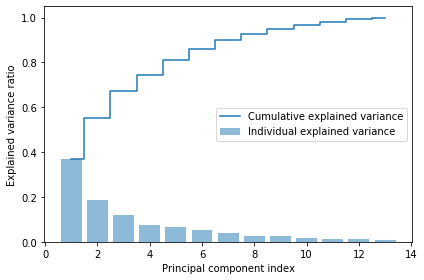

In [6]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,14), var_exp, alpha=0.5, align='center',
label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',
label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Như ta có thể thấy, chỉ với 2 principal component đầu đã chiếm khoảng gần 60% lượng thông tin.

In [7]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [8]:
U = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix U:\n', U)

Matrix U:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


Matrix $U$ chính là ma trận giúp ta chuyển đổi dữ liệu D chiều sang K chiều với K $\leq$ D
- Vector: $x' = xU$
- Matrix: $X' = XU$

In [9]:
x_origin = X_train_std[0].shape[0]
x_new = X_train_std[0].dot(U).shape[0]
print('Từ', x_origin, 'chiều còn lại', x_new, 'chiều')

Từ 13 chiều còn lại 2 chiều


In [10]:
X_train_pca = X_train_std.dot(U)

In [11]:
print(X_train_std.shape, X_train_pca.shape)

(124, 13) (124, 2)


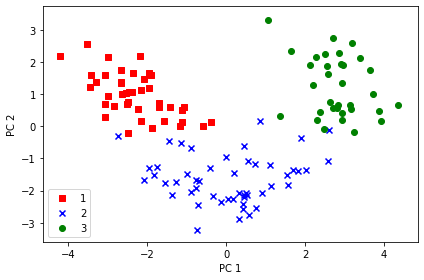

In [12]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0], X_train_pca[y_train==l, 1], c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

- Dữ liệu được trải rộng hơn ở trục PC 1 - thành phần chính đầu tiên (the first principal component)
- Dữ liệu được trải rộng it hơn ở trục PC 2 - thành phần chính thứ hai (the second principal component)

##### Phần này ta áp dụng thư viện sklearn để giảm chiều dữ liệu và training 

In [13]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.6, color=cmap(idx), edgecolor='black', marker=markers[idx], label=cl)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
# initializing the PCA transformer and
# logistic regression estimator:
pca = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
# dimensionality reduction:
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
# fitting the logistic regression model on the reduced dataset:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=1, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Phân loại dữ liệu trên tập train chỉ với dữ liệu 2 chiều

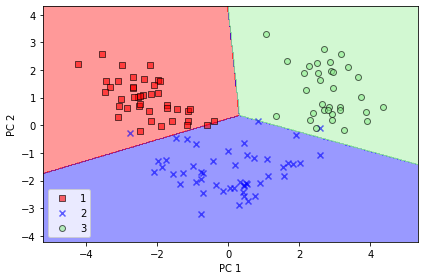

In [21]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Phân loại dữ liệu trên tập test chỉ với dữ liệu 2 chiều

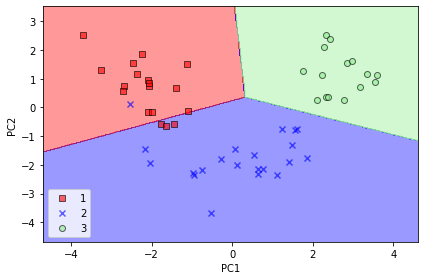

In [15]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Ta có thể thấy chỉ có một vài điểm bị phân loại sai, logistic regression hoạt động khá tốt trên không gian hai chiều này.

# 4. Kết luận

## 4.1 Ưu điểm của PCA

- Loại bỏ các đặc trưng tương quan (giảm các đặc trưng)
- Cải thiện hiệu suất thuật toán
- Giảm quá khớp (*overfitting*)
- Cải thiện trực quan hóa dữ liệu (dễ trực quan hóa khi có ít chiều)

## 4.2 Nhược điểm của PCA

- Các biến độc lập trở nên khó hiểu hơn (các đặc trưng mới không dễ đọc và dễ hiểu như các đặc trưng ban đầu).
- Chuẩn hóa dữ liệu trước khi sử dụng PCA.
- Mất thông tin.

# 5. Tài liệu tham khảo

$^{[1]}$ [Python machine learning book](https://www.amazon.com/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939)

$^{[2]}$ [Principal Component Analysis - Machine learning co ban](https://machinelearningcoban.com/2017/06/15/pca/)

$^{[3]}$ [Rpubs: PCA - Principal Components Analysis](https://rpubs.com/vudt1993/257891)

$^{[4]}$ [What are the Pros and cons of the PCA?](https://www.i2tutorials.com/what-are-the-pros-and-cons-of-the-pca/)